<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Decision%20trees(Fraudcheck).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
path = r"/content/Fraud_check.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data['Taxable_Income_Category'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [5]:
categorical_vars = ['Undergrad', 'Marital.Status', 'Urban']
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

In [6]:
X = data_encoded.drop(['Taxable.Income', 'Taxable_Income_Category'], axis=1)
y = data_encoded['Taxable_Income_Category']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

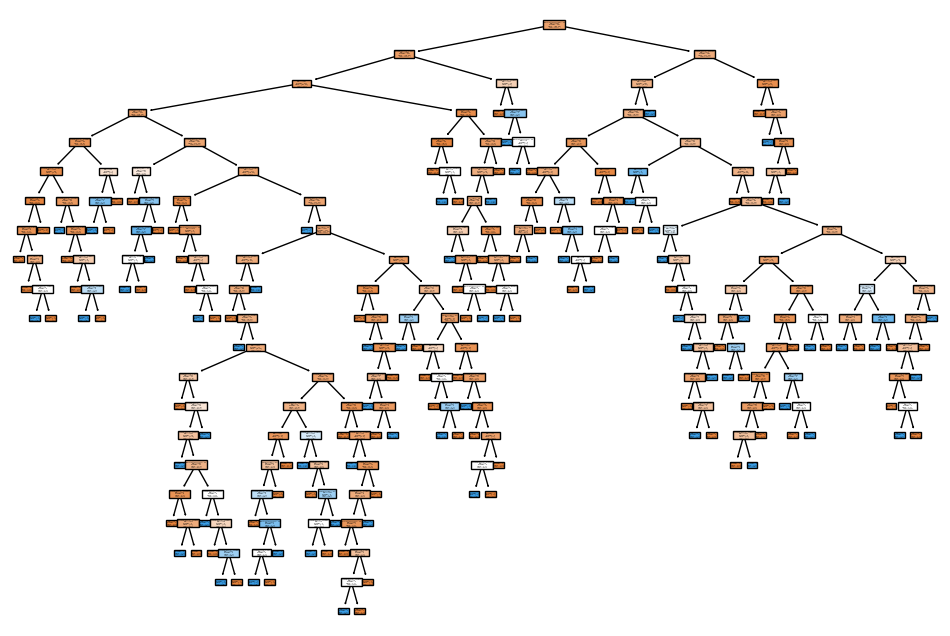

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()